The objective of this notebook is to determine what the important factors contributing to a nation's happiness are, as well as deducing if the overall World Happiness is increasing or not.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [6]:
d16 = pd.read_csv('2016.csv')
d17 = pd.read_csv('2017.csv')
d18 = pd.read_csv('2018.csv')
d19 = pd.read_csv('2019.csv')

We shall add a new column to each, specifying their year:

In [7]:
d16

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [8]:
d16['Year'] = 2016
d17['Year'] = 2017
d18['Year'] = 2018
d19['Year'] = 2019

In [9]:
d16.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')

Renaming all other datasets' columns to maintain consistency:

In [10]:
d17.columns = ['Country', 'Happiness Rank', 'Happiness Score', 'Whisker high',
       'Whisker low', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia Residual', 'Year']
d18.columns = ['Happiness Rank', 'Country', 'Happiness Score', 'Economy (GDP per Capita)',
       'Social support', 'Health (Life Expectancy)',
       'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Year']
d19.columns = ['Happiness Rank', 'Country', 'Happiness Score', 'Economy (GDP per Capita)',
       'Social support', 'Health (Life Expectancy)',
       'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Year']

Checking for null values:

In [11]:
d16.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

In [12]:
d17.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Whisker high                     0
Whisker low                      0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Generosity                       0
Trust (Government Corruption)    0
Dystopia Residual                0
Year                             0
dtype: int64

In [13]:
d18.isnull().sum()

Happiness Rank                   0
Country                          0
Happiness Score                  0
Economy (GDP per Capita)         0
Social support                   0
Health (Life Expectancy)         0
Freedom                          0
Generosity                       0
Trust (Government Corruption)    1
Year                             0
dtype: int64

In [14]:
d19.isnull().sum()

Happiness Rank                   0
Country                          0
Happiness Score                  0
Economy (GDP per Capita)         0
Social support                   0
Health (Life Expectancy)         0
Freedom                          0
Generosity                       0
Trust (Government Corruption)    0
Year                             0
dtype: int64

In [16]:
d18.dropna(axis = 0, inplace = True)

Happiest Country; 2016:

In [17]:
grouped_regions = d16.groupby('Country').mean()
grouped_regions[['Happiness Score','Happiness Rank']].sort_values('Happiness Score', ascending=False)

,Happiness Score,Happiness Rank
Country,,
Denmark,7.526,1
Switzerland,7.509,2
Iceland,7.501,3
Norway,7.498,4
Finland,7.413,5
...,...,...
Benin,3.484,153
Afghanistan,3.360,154
Togo,3.303,155


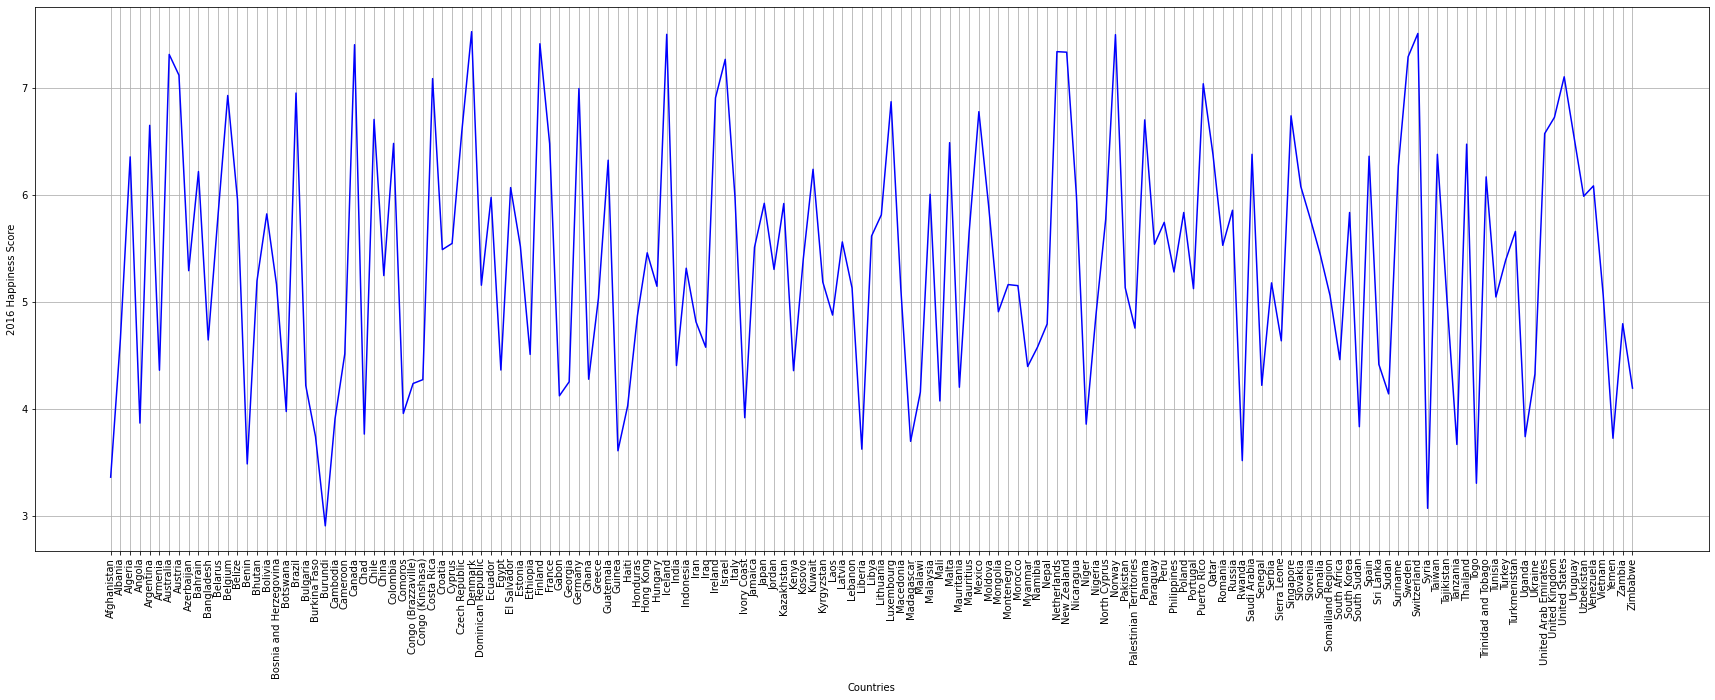

In [20]:
regions = sorted(list(d16['Country'].unique()))

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = 30,10
plt.plot(regions, grouped_regions['Happiness Score'], color='blue')
plt.xticks(rotation = 'vertical')
plt.xlabel('Countries')
plt.ylabel('2016 Happiness Score')
plt.grid()
plt.show()

Happiest Country, 2017:

In [23]:
grouped_regions1 = d17.groupby('Country').mean()
grouped_regions1[['Happiness Score','Happiness Rank']].sort_values('Happiness Score', ascending=False)

regions1 = sorted(list(d17['Country'].unique()))

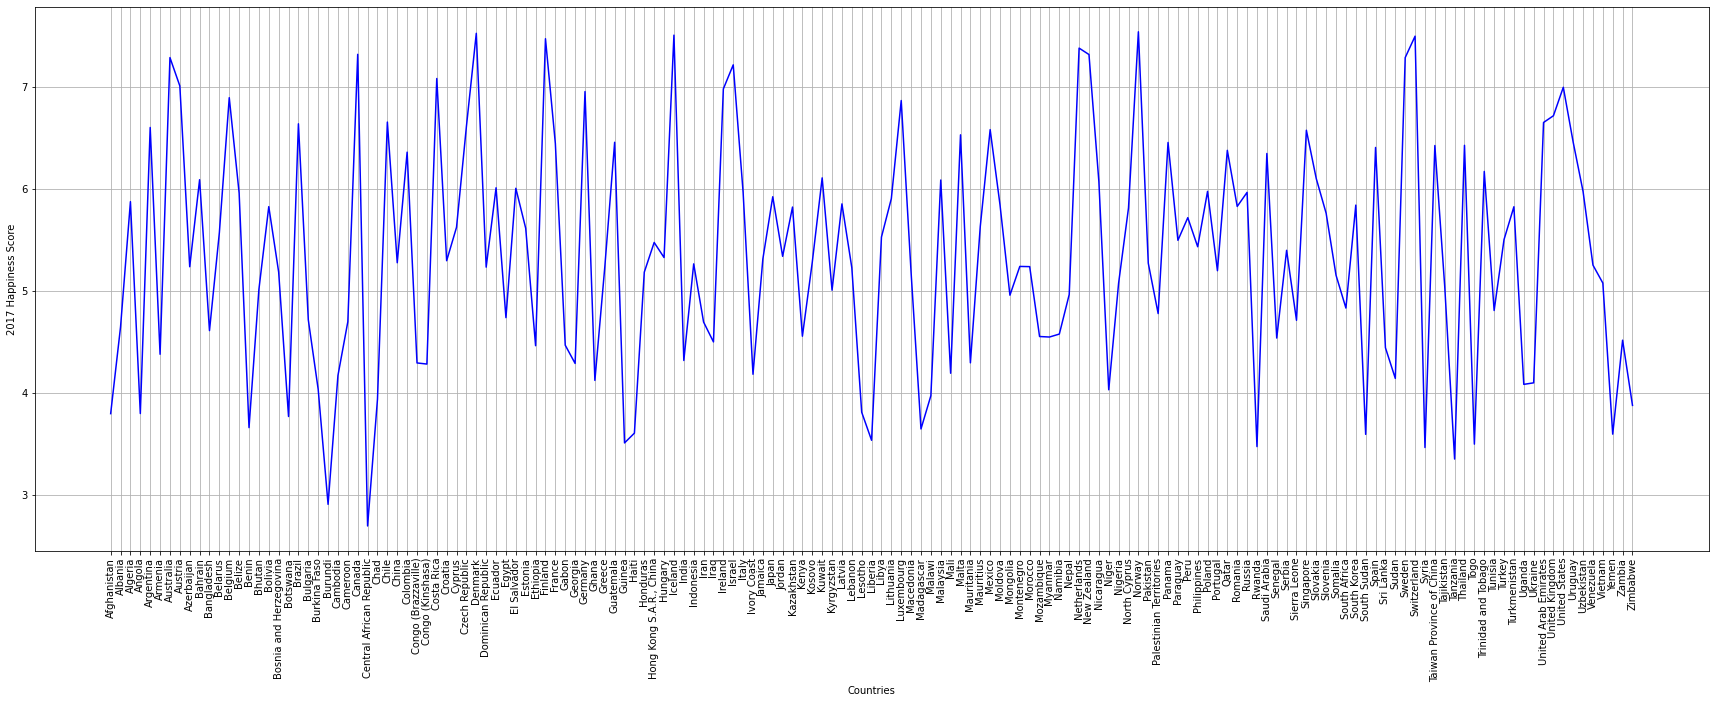

In [25]:
plt.plot(regions1, grouped_regions1['Happiness Score'], color='blue')
plt.xticks(rotation = 'vertical')
plt.xlabel('Countries')
plt.ylabel('2017 Happiness Score')
plt.grid()
plt.show()

Concatenating first 10 fields for all datasets:

In [26]:
result = pd.concat([d16.head(10), d17.head(10), d18.head(10), d19.head(10)],axis=0)
result.reset_index(drop=True,inplace=True)

In [27]:
res = result.groupby('Country').mean()
res[['Happiness Score']].sort_values(by='Happiness Score',ascending=False)

,Happiness Score
Country,
Finland,7.570750
Denmark,7.550750
Norway,7.545750
Iceland,7.498500
Switzerland,7.492500
Netherlands,7.411250
Canada,7.331500
New Zealand,7.319750
Sweden,7.308000


In [28]:
countries = sorted(list(result['Country'].unique()))
countries

['Australia',
 'Austria',
 'Canada',
 'Denmark',
 'Finland',
 'Iceland',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Sweden',
 'Switzerland']

Happiest Countries in the World respective to Happiness Score:

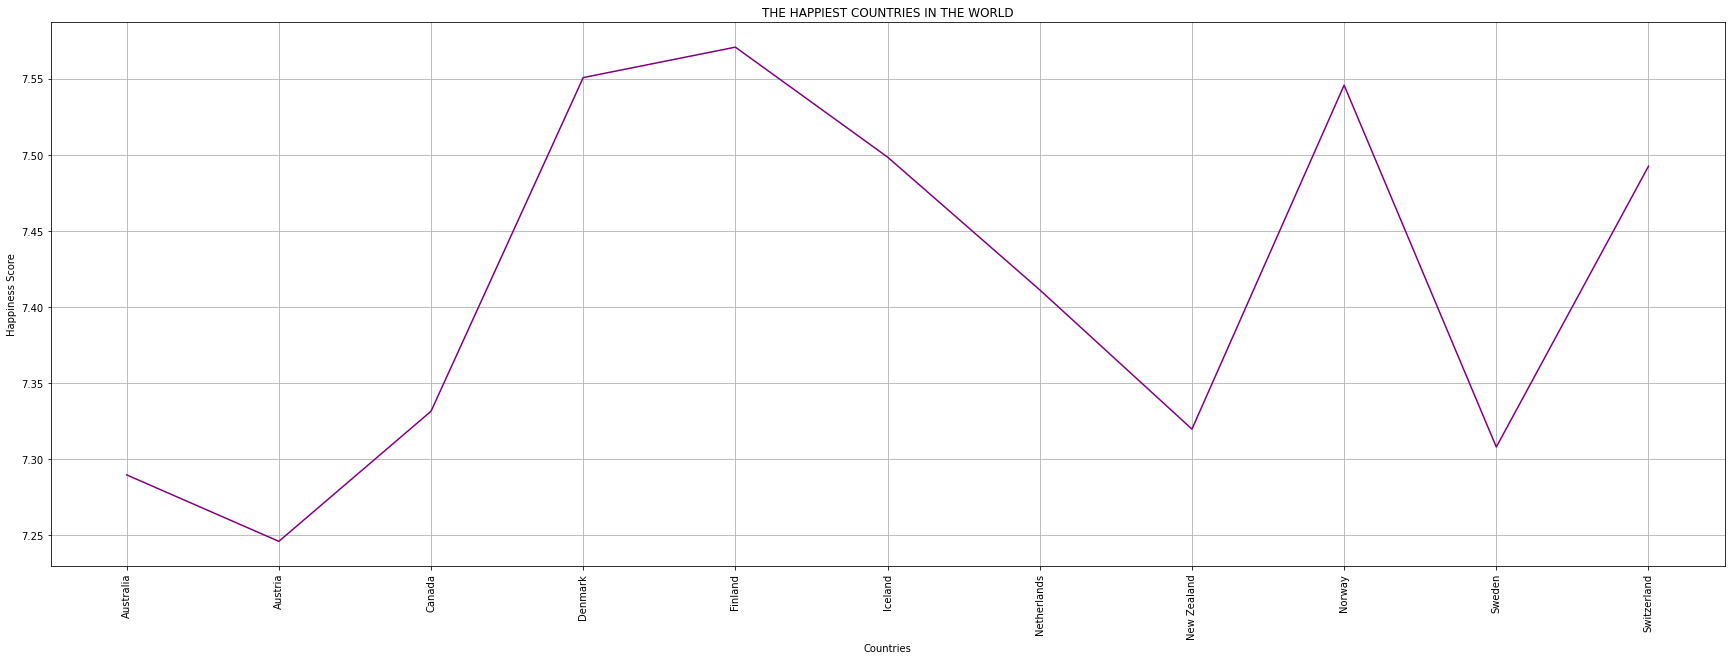

In [29]:
plt.plot(countries,(res['Happiness Score']), color='Purple')
plt.xticks(rotation = 'vertical')
plt.xlabel('Countries')
plt.ylabel('Happiness Score')
plt.title('the Happiest Countries in the world'.upper())
plt.grid()
plt.show()

Now, we take a look at the factors which contribute to a country's happiness the most: 

In [30]:
d16.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.0
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807,2016.0
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220,0.0
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890,2016.0
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710,2016.0
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740,2016.0
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650,2016.0
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720,2016.0


In [31]:
d16[d16['Freedom']>=0.549092].groupby('Region').count()[['Country']]

,Country
Region,
Australia and New Zealand,2
Central and Eastern Europe,1
Latin America and Caribbean,1
Middle East and Northern Africa,2
North America,1
Southeastern Asia,2
Sub-Saharan Africa,1
Western Europe,8


In [32]:
d16[d16['Health (Life Expectancy)']>=0.811013].groupby('Region').count()[['Country']]

,Country
Region,
Australia and New Zealand,2
Eastern Asia,3
Latin America and Caribbean,1
Middle East and Northern Africa,1
North America,1
Southeastern Asia,1
Western Europe,13


In [33]:
d16[d16['Economy (GDP per Capita)']>=1.158448].groupby('Region').count()[['Country']]

,Country
Region,
Australia and New Zealand,2
Central and Eastern Europe,12
Eastern Asia,4
Latin America and Caribbean,5
Middle East and Northern Africa,7
North America,2
Southeastern Asia,2
Sub-Saharan Africa,1
Western Europe,21


In [34]:
d16.corr()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
Happiness Rank,1.000000,-0.995743,-0.994928,-0.995525,-0.793577,-0.733276,-0.767991,-0.557169,-0.387102,-0.145369,-0.542616,NaN
Happiness Score,-0.995743,1.000000,0.999485,0.999474,0.790322,0.739252,0.765384,0.566827,0.402032,0.156848,0.543738,NaN
Lower Confidence Interval,-0.994928,0.999485,1.000000,0.997919,0.790673,0.741523,0.769177,0.566857,0.404840,0.158025,0.538793,NaN
Upper Confidence Interval,-0.995525,0.999474,0.997919,1.000000,0.789140,0.736184,0.760752,0.566203,0.398775,0.155495,0.548164,NaN
Economy (GDP per Capita),-0.793577,0.790322,0.790673,0.789140,1.000000,0.669540,0.837067,0.362283,0.294185,-0.025531,0.068624,NaN
Family,-0.733276,0.739252,0.741523,0.736184,0.669540,1.000000,0.588377,0.450208,0.213561,0.089629,0.119672,NaN
Health (Life Expectancy),-0.767991,0.765384,0.769177,0.760752,0.837067,0.588377,1.000000,0.341199,0.249583,0.075987,0.100857,NaN
Freedom,-0.557169,0.566827,0.566857,0.566203,0.362283,0.450208,0.341199,1.000000,0.502054,0.361751,0.091631,NaN
Trust (Government Corruption),-0.387102,0.402032,0.404840,0.398775,0.294185,0.213561,0.249583,0.502054,1.000000,0.305930,-0.002909,NaN
Generosity,-0.145369,0.156848,0.158025,0.155495,-0.025531,0.089629,0.075987,0.361751,0.305930,1.000000,-0.133001,NaN


Health as a Happiness contributor:

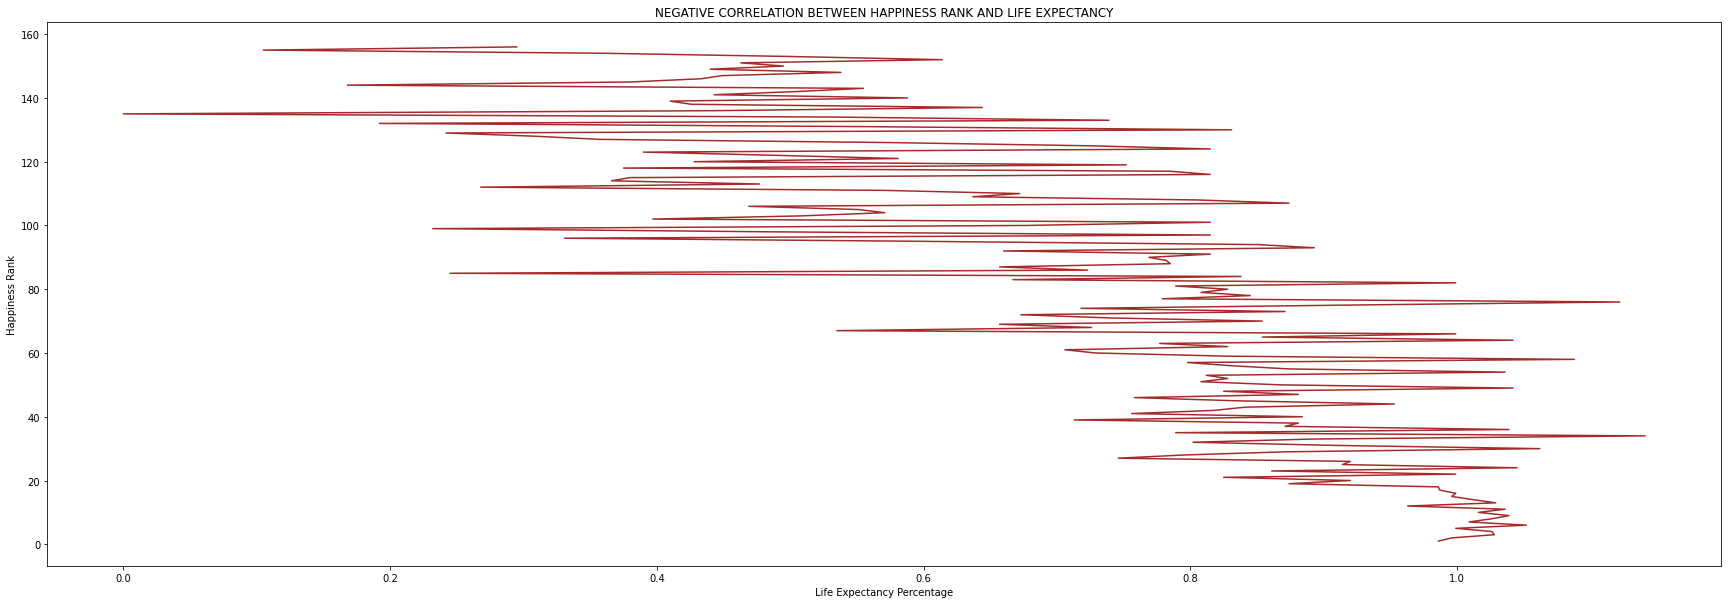

In [35]:
import matplotlib.pyplot as plt

plt.plot((d19['Health (Life Expectancy)']),(d19['Happiness Rank']), color='brown')
plt.xlabel('Life Expectancy Percentage')
plt.ylabel('Happiness Rank')
plt.title('Negative Correlation between Happiness Rank and Life Expectancy'.upper())
plt.show()

Freedom as a Happiness contributor:

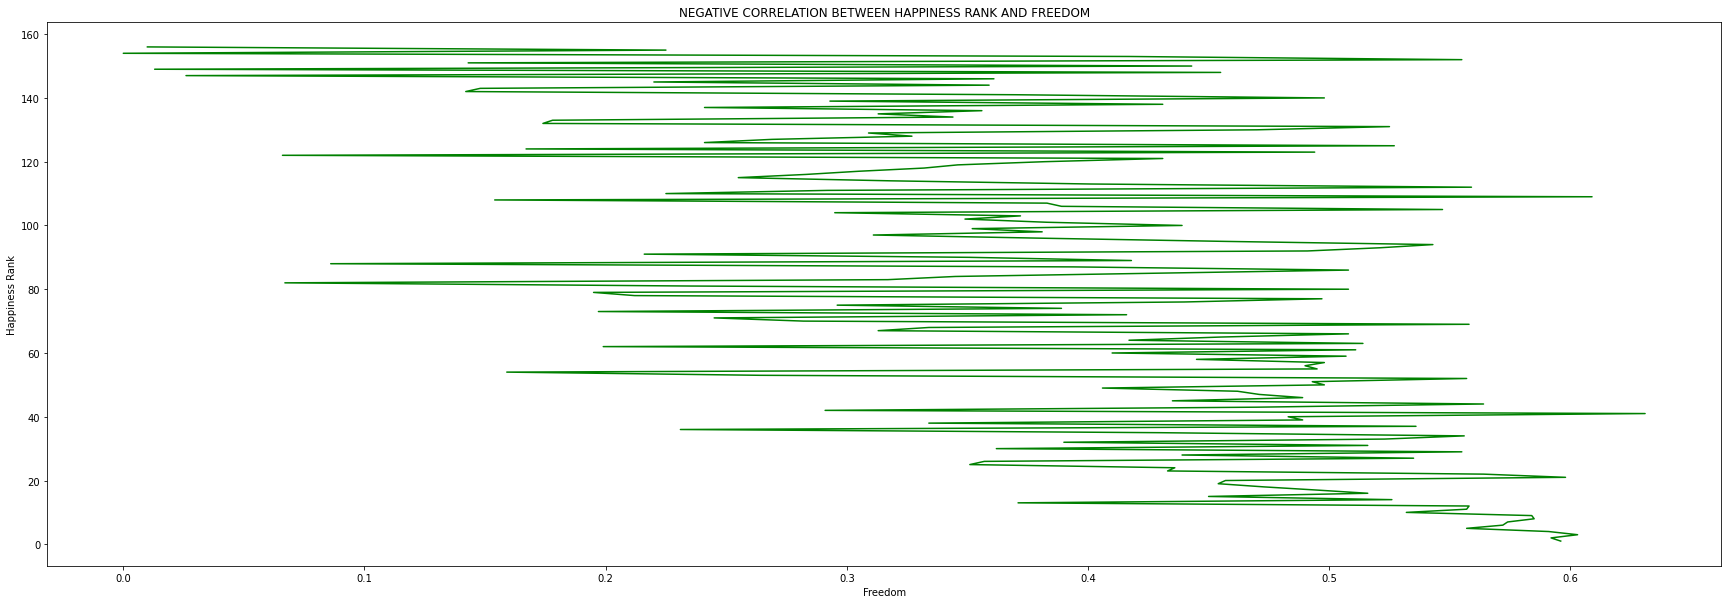

In [36]:
plt.plot((d19['Freedom']),(d19['Happiness Rank']), color='green')
plt.xlabel('Freedom')
plt.ylabel('Happiness Rank')
plt.title('Negative correlation between Happiness Rank and Freedom'.upper())
plt.show()

Economy as a Happiness contributor:

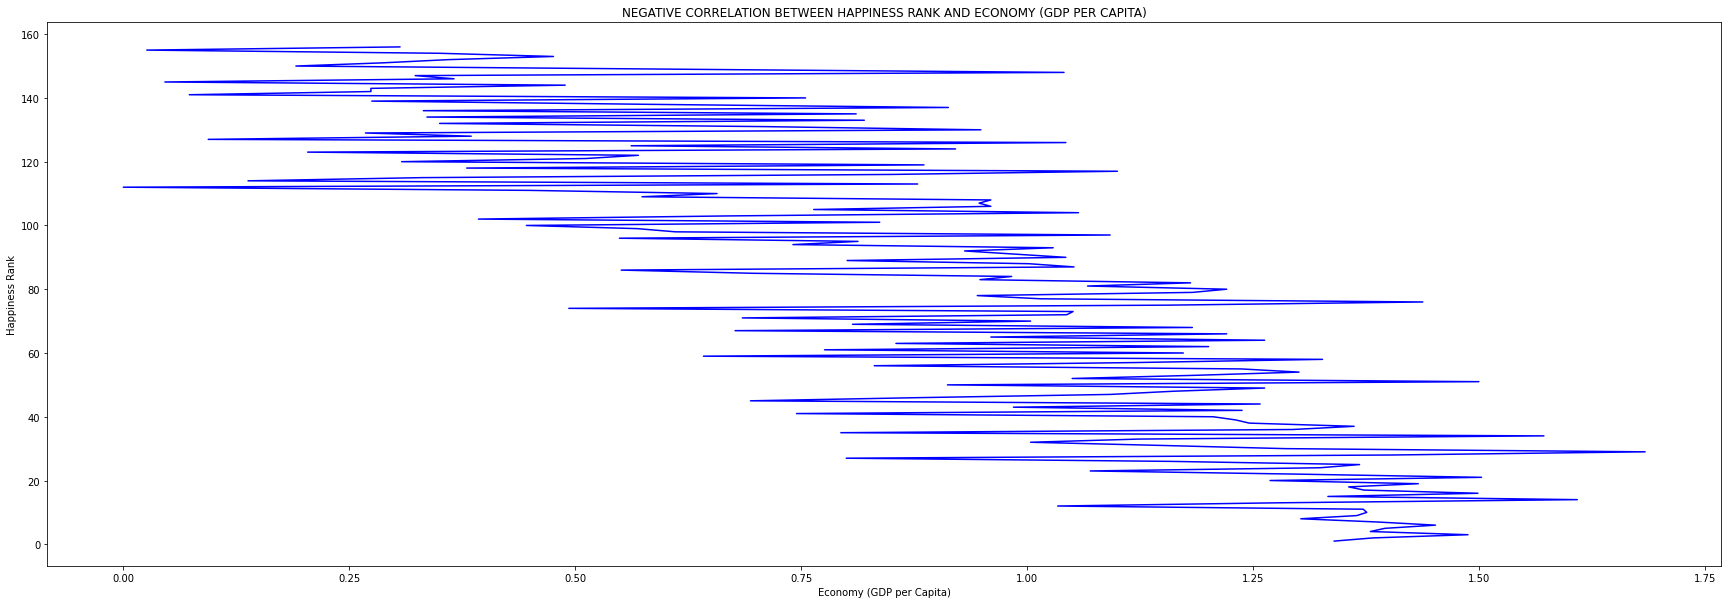

In [37]:
plt.plot((d19['Economy (GDP per Capita)']),(d19['Happiness Rank']), color='blue')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Rank')
plt.title('Negative correlation between Happiness rank and Economy (GDP per Capita)'.upper())
plt.show()

Government Corruption as a Happiness contributor:

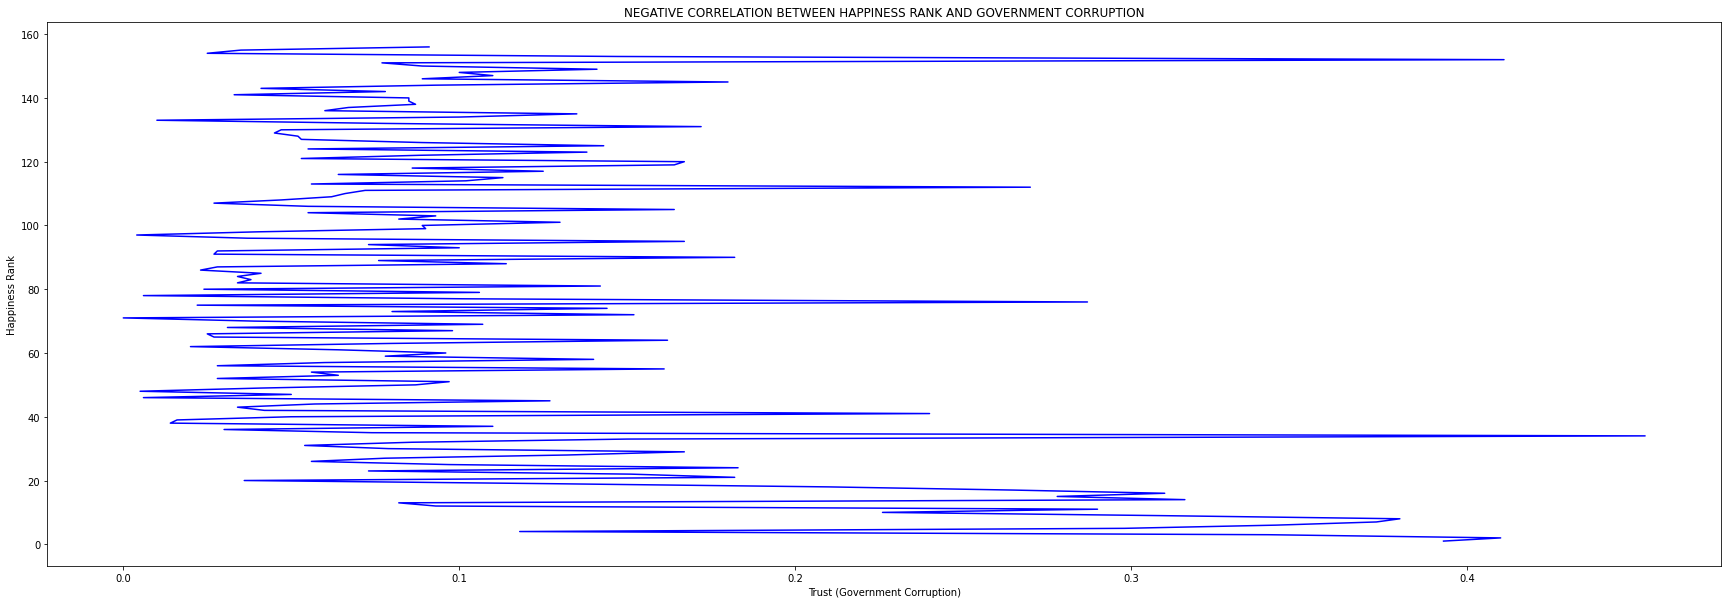

In [38]:
plt.plot((d19['Trust (Government Corruption)']),(d19['Happiness Rank']), color='blue')
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Happiness Rank')
plt.title('Negative correlation between Happiness Rank and Government Corruption'.upper())
plt.show()

From the given data, we can infer that:

a) Health, Freedom and Economy are important factors to a nation's happiness.

b) Government Corruption does not hold as much magnitude.

Now, let's find out if  World Happiness increasing or not.

In [40]:
merged_data = pd.concat([d16,d17,d18,d19],axis=0)
merged_data.reset_index(drop=True,inplace=True)
merged_data = merged_data[['Year','Happiness Score']]

In [41]:
happiness = merged_data.groupby('Year').mean()
happiness

,Happiness Score
Year,
2016,5.382185
2017,5.354019
2018,5.366897
2019,5.407096


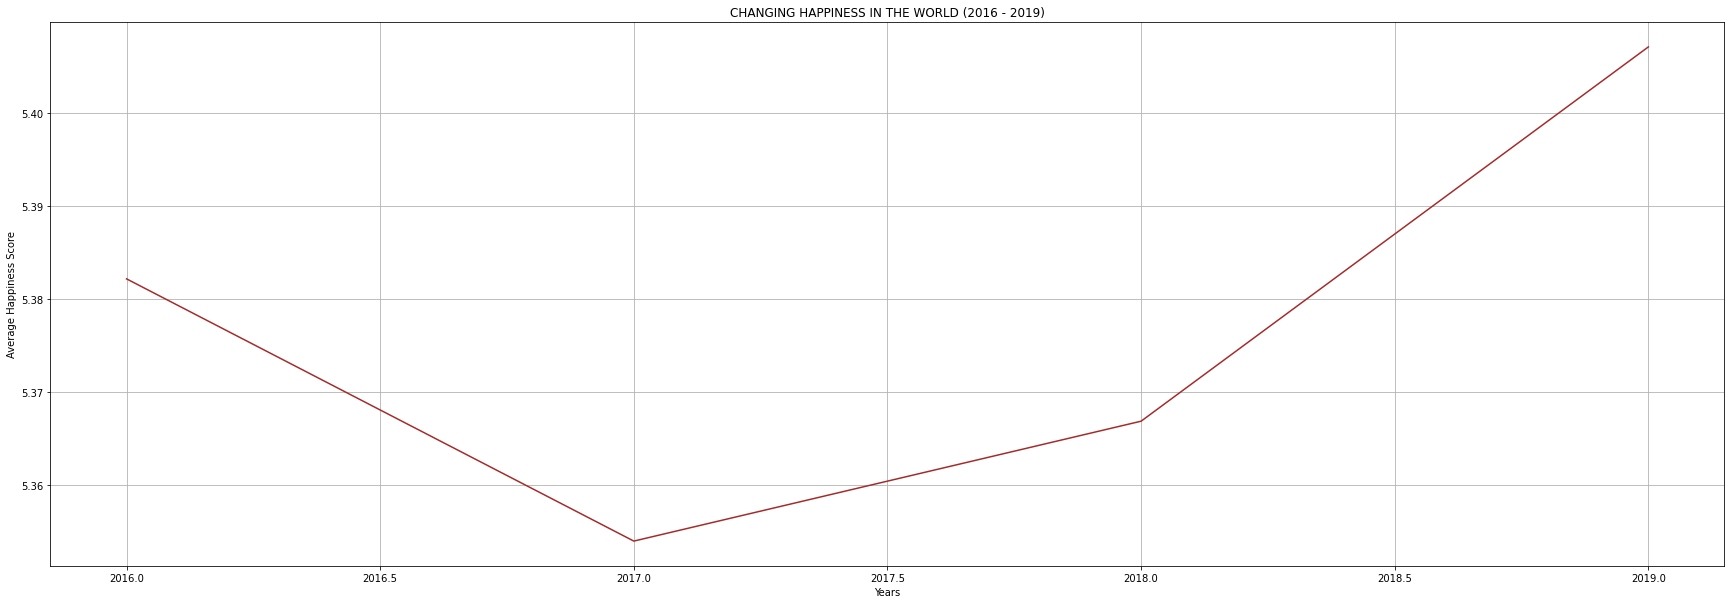

In [45]:
plt.plot(years,(happiness['Happiness Score']), color='brown')
plt.xlabel('Years')
plt.ylabel('Average Happiness Score')
plt.title('Changing happiness in the World (2016 - 2019)'.upper())
plt.grid()
plt.show()

Through the chart, we can infer that overall happiness decreased from 2016 to 2018, but increased well-over 2016's happiness score in 2019.